In [2]:
#Project: LAP technologies preparatives
#
#Dataset : https://www.kaggle.com/yunlevin/levin-vehicle-telematics/kernels?sortBy=date&group=upvoted&pageSize=20&datasetId=10553
#

from datetime import datetime
import time
import math
import os
import numpy as np
import scipy as sp
import pandas as pd
from pandas import set_option
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as md
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sklearn
import statsmodels as stm
import patsy
%matplotlib inline

In [2]:
#Import part of the dataset

directory = "/home/andres/Dropbox/LAP_project/Routines/lap_technologies/test_set/"

os.chdir(directory)

#Load  until the car 4 only

trucks = pd.read_csv('allcars.csv',nrows = 500000)

In [3]:
# Observations and columns
trucks.shape

(500000, 18)

In [4]:
# View the columns
trucks.columns

Index(['Unnamed: 0', 'timeStamp', 'tripID', 'accData', 'gps_speed', 'battery',
       'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed',
       'tAdv', 'tPos', 'deviceID'],
      dtype='object')

In [5]:
trucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
Unnamed: 0    500000 non-null int64
timeStamp     500000 non-null object
tripID        500000 non-null int64
accData       500000 non-null object
gps_speed     380212 non-null float64
battery       380212 non-null float64
cTemp         106460 non-null float64
dtc           106460 non-null float64
eLoad         380212 non-null float64
iat           106460 non-null float64
imap          106460 non-null float64
kpl           380212 non-null float64
maf           380212 non-null float64
rpm           380212 non-null float64
speed         500000 non-null float64
tAdv          106460 non-null float64
tPos          380212 non-null float64
deviceID      500000 non-null int64
dtypes: float64(13), int64(3), object(2)
memory usage: 68.7+ MB


In [6]:
#A glimpse of the dataset
trucks.describe()

,Unnamed: 0,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,500000.000000,500000.000000,380212.000000,380212.00000,106460.000000,106460.0,380212.000000,106460.000000,106460.000000,380212.000000,380212.000000,380212.000000,500000.000000,106460.0,380212.000000,500000.000000
mean,101341.504262,63.917586,8.261171,9.01670,64.143575,0.0,36.487072,31.122901,96.442175,6.985664,2.707731,1081.075566,22.072036,0.0,7.903514,2.869714
std,75102.940840,44.047337,13.946388,6.23467,29.107386,0.0,22.048786,15.797552,47.344598,9.109200,8.739160,680.860793,23.805592,0.0,8.202237,1.298722
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,41666.000000,20.000000,0.000000,0.00000,60.000000,0.0,29.019608,24.000000,97.000000,0.000000,0.000000,850.000000,0.000000,0.0,0.000000,2.000000
50%,83333.000000,63.000000,0.000000,12.88000,80.000000,0.0,29.019608,34.000000,99.000000,0.000000,0.000000,1200.000000,20.000000,0.0,5.882353,4.000000
75%,151065.250000,109.000000,13.300000,12.88000,81.000000,0.0,47.450980,43.000000,110.000000,18.005960,6.040000,1256.250000,36.000000,0.0,14.901961,4.000000
max,276065.000000,128.000000,82.100000,59.39900,84.000000,0.0,99.607843,58.000000,221.000000,1095.112500,593.990000,14849.750000,232.000000,0.0,90.980392,4.000000


In [7]:
#Split the dataset for truck 2s

df4 = trucks.loc[trucks['deviceID'] == 2]

#Drop the unknown columns 

df4 = df4.drop(['dtc','tAdv','deviceID'], axis = 1)

df4.describe()

,Unnamed: 0,tripID,gps_speed,battery,cTemp,eLoad,iat,imap,kpl,maf,rpm,speed,tPos
count,106659.000000,106659.000000,106659.000000,106659.000000,106460.000000,106659.000000,106460.000000,106460.000000,106659.000000,106659.000000,106659.000000,106659.000000,106659.000000
mean,53329.000000,63.579239,18.188948,0.009114,64.143575,35.413494,31.122901,96.442175,0.000664,0.025123,1182.769860,33.042819,0.001324
std,30789.945518,38.780889,18.726188,0.665543,29.107386,22.531762,15.797552,47.344598,0.048472,1.834499,762.717486,34.009781,0.096652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26664.500000,25.000000,0.000000,0.000000,60.000000,22.352941,24.000000,97.000000,0.000000,0.000000,800.750000,0.000000,0.000000
50%,53329.000000,60.000000,13.600000,0.000000,80.000000,38.823529,34.000000,99.000000,0.000000,0.000000,1165.750000,25.000000,0.000000
75%,79993.500000,99.000000,27.700000,0.000000,81.000000,48.235294,43.000000,110.000000,0.000000,0.000000,1732.500000,50.000000,0.000000
max,106658.000000,126.000000,82.100000,48.607000,84.000000,94.901961,58.000000,221.000000,3.540058,133.980000,5508.500000,157.000000,7.058824


In [8]:
# Get data for individual Trips
# Selected_trip : Id of a particular trip

#selected_trip = 10

#for tripID in set(df4['tripID'].values):
#    df_trip = df4[df4['tripID']==10

#df_trip.head()

In [9]:
## Now we select the largest trips from each vehicle


#Find the largets trip in dataframe and report wich its ID

def largest_trip(df, column):
    x = np.zeros(np.max(df[column]))
    for i in range(0,np.max(df[column])):
        x[i] = len(df.loc[df[column] == i])
    return(np.max(x),np.argmax(x))



In [10]:
print('Vehicle 4: ',largest_trip(df4, 'tripID'))

Vehicle 4:  (4256.0, 124)


In [11]:
#Longest trip

trip136_car4 = df4.loc[df4['tripID'] == 124]

trip_study = trip136_car4

In [12]:
trip136_car4.head()

,Unnamed: 0,timeStamp,tripID,accData,gps_speed,battery,cTemp,eLoad,iat,imap,kpl,maf,rpm,speed,tPos
219426,102151,2017-12-31 19:25:12.000000,124,0f78fe9806a0070cb50404b60000000000000000000000...,6.5,0.0,64.0,40.392157,48.0,97.0,0.0,0.0,930.25,14.0,0.0
219427,102152,2017-12-31 19:25:13.000000,124,0f68fe2806100203b60001c60c11c9f80bbc010cbdfd09...,6.5,0.0,64.0,41.960784,48.0,96.0,0.0,0.0,923.75,14.0,0.0
219428,102153,2017-12-31 19:25:14.000000,124,0f20fe700638040fc20309b8040bbd0711c00007c0060e...,6.5,0.0,64.0,38.823529,48.0,96.0,0.0,0.0,979.00,14.0,0.0
219429,102154,2017-12-31 19:25:15.000000,124,0fa8fdf806400610b50c10c30911cd060fb70107bbf105...,6.3,0.0,65.0,41.960784,48.0,97.0,0.0,0.0,992.00,15.0,0.0
219430,102155,2017-12-31 19:25:16.000000,124,0f48fe980660ff0eae0a1cbd1e16d5030fc10817ab0418...,8.1,0.0,65.0,46.274510,48.0,97.0,0.0,0.0,1094.75,16.0,0.0


In [13]:
## We convert the time stamp column to datetime format used by pandas 

trip136_car4['timeStamp'] = pd.to_datetime(trip136_car4['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f")

/home/andres/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
## Ploting the time series 

trip136_car4temp = trip136_car4

#setting the timeStamp column like the dataframe new index
trip136_car4temp.set_index('timeStamp', inplace=True)

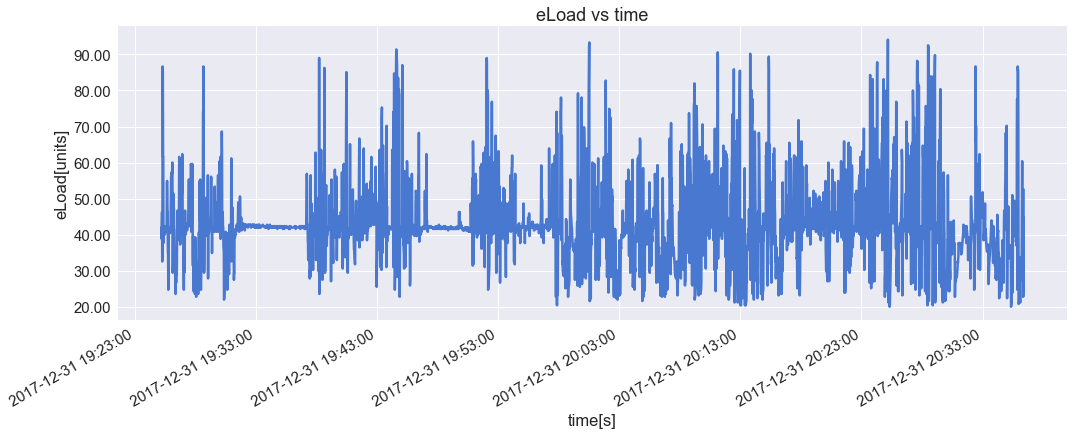

In [15]:
#Example time serie plot
title = 'eLoad vs time'
f= plt.figure(figsize = (17,6))
#ax = sns.tsplot(data=trip78temp['eLoad'])
plt.title(title)
#ticklabels = trip78temp.index.strftime('%Y-%m-%d %H:%M:%S')
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax = trip136_car4temp['eLoad'].plot()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.ylabel('eLoad[units]')
plt.xlabel('time[s]')
plt.show()

In [16]:
def plot_time_series(feature, title, xlabel, ylabel, datetimeformat):
    
    f= plt.figure(figsize = (17,6))
    plt.title(title)
    plt.subplots_adjust(bottom=0.2)
    plt.xticks( rotation=25 )
    ax = plt.gca()
    xfmt = md.DateFormatter(datetimeformat)
    ax.xaxis.set_major_formatter(xfmt)
    ax = feature.plot(color='b',lw = 1)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    return ax

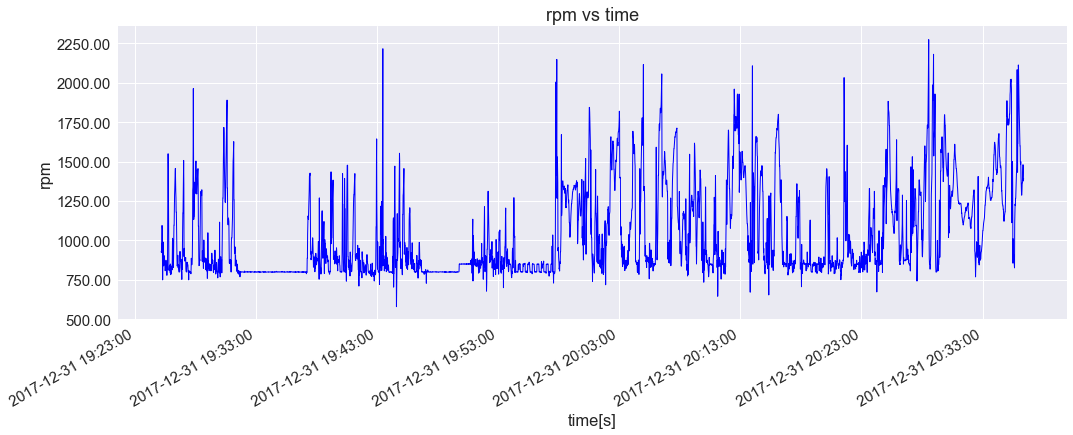

In [17]:
datetimeformat = '%Y-%m-%d %H:%M:%S'
plot_time_series(trip136_car4temp['rpm'], 'rpm vs time', 'time[s]', 'rpm', datetimeformat)

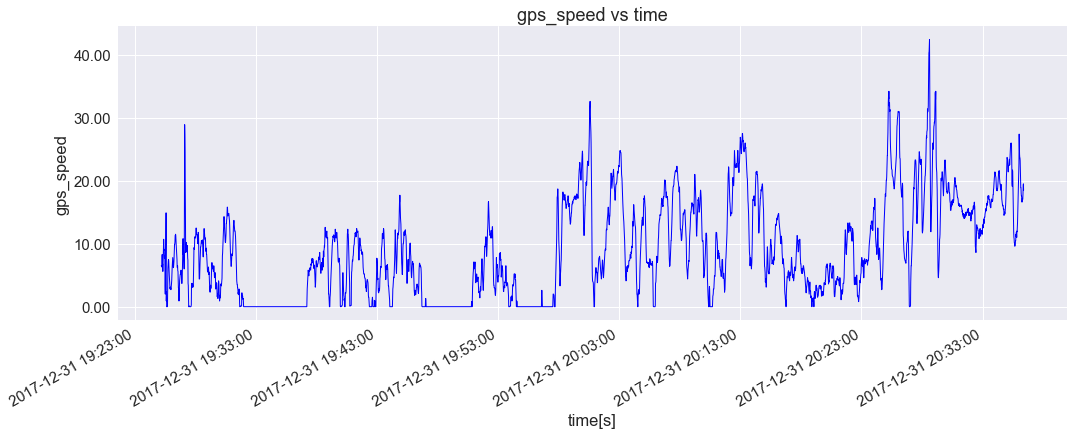

In [18]:
plot_time_series(trip136_car4temp['gps_speed'], 'gps_speed vs time', 'time[s]', 'gps_speed', datetimeformat)
    
 

In [19]:
# Initial exploration of the dataset:
# 
# Scatter matrix and correlation between features
# 


corr_matrix = df4.corr()

corr_matrix["rpm"].sort_values(ascending=False)


rpm           1.000000
speed         0.872365
gps_speed     0.854732
imap          0.835326
cTemp         0.689612
eLoad         0.586724
iat           0.415516
maf           0.077670
kpl           0.077670
tPos          0.077670
battery       0.077670
tripID       -0.343007
Unnamed: 0   -0.353169
Name: rpm, dtype: float64

In [20]:
df4.columns

Index(['Unnamed: 0', 'timeStamp', 'tripID', 'accData', 'gps_speed', 'battery',
       'cTemp', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tPos'],
      dtype='object')

In [21]:

# Replace zeros by NaN's for plotting with Seaborn

#df4 = df4.replace(0.0,np.nan)

attributes = ['gps_speed', 'battery', 'cTemp',
       'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tPos']

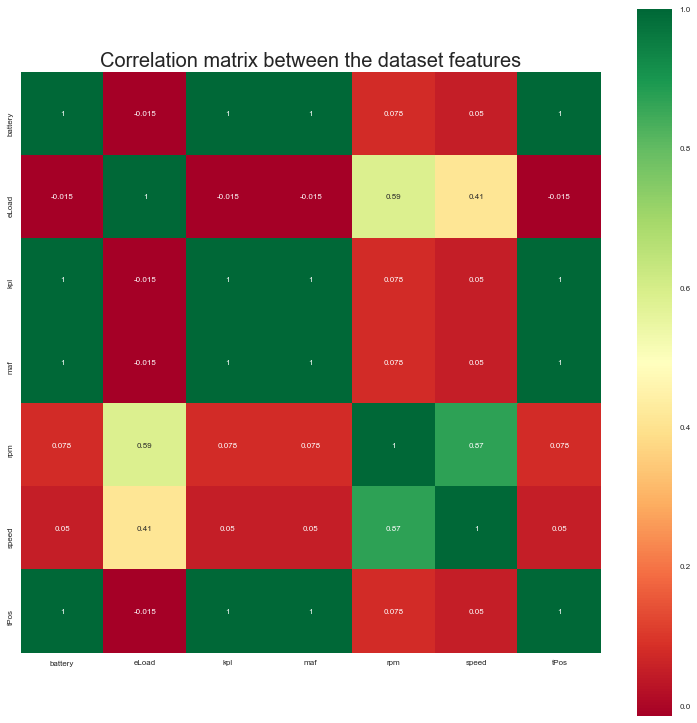

In [22]:
import seaborn as sns

correlation_matrix = df4.drop(['accData','Unnamed: 0', 'tripID', 'gps_speed', 'cTemp', 'iat', 'imap','timeStamp'], axis=1).corr()

plt.figure(figsize=(13,13))

plt.rcParams.update({'font.size': 8})
plt.rc('axes', titlesize = 20)
plt.rc('axes', labelsize = 10)
plt.rc('xtick', labelsize = 8)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 8)    # fontsize of the tick labels
plt.rc('legend', fontsize = 8)    # legend fontsize
plt.rc('figure', titlesize = 20)
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the dataset features')
plt.show()


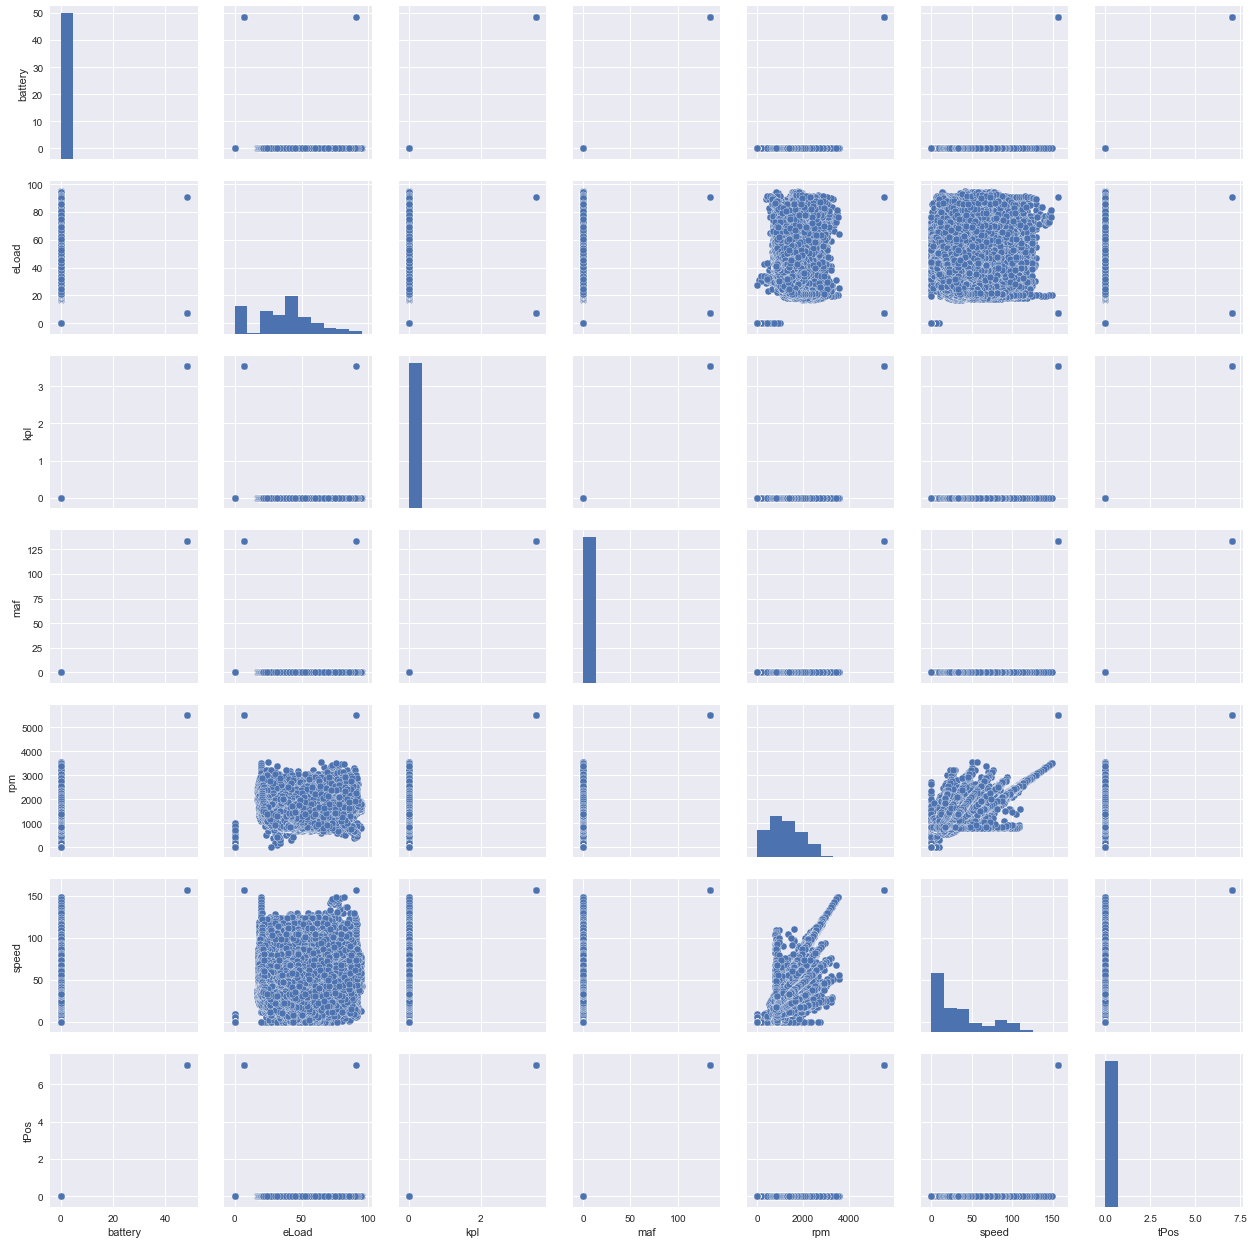

In [24]:
#save plot display settings to change back to when done plotting with seaborn

df4 = df4.replace(np.nan,0.0)


sns.set()
sns.pairplot(df4.drop(['accData','Unnamed: 0', 'tripID', 'gps_speed', 'cTemp', 'iat', 'imap','timeStamp'],axis=1))


In [3]:
# Extracting features fron the dataset

#Exploring tsfresh: http://tsfresh.readthedocs.io/en/latest/index.html


#For extracting all features, we do:
import os

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute


#Import part of the dataset

directory = "/home/andres/Dropbox/LAP_project/Routines/lap_technologies/test_set/"

os.chdir(directory)

#Load  until the car 2 only

trucks = pd.read_csv('allcars.csv',nrows = 118000)


In [4]:
trucks.tail()

,Unnamed: 0,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
117995,720,2017-12-22 18:49:01.000000,3,1050f8f004900515cc090fb80b19ad0316d50c1ecefe12...,21.4,0.0,81.0,0.0,58.039216,30.0,99.0,0.0,0.0,1173.75,38,0.0,0.0,2
117996,721,2017-12-22 18:49:02.000000,3,1028f8f004200207b10513c30d21dbed09a80214d2f508...,22.2,0.0,81.0,0.0,52.549020,30.0,102.0,0.0,0.0,1217.75,39,0.0,0.0,2
117997,722,2017-12-22 18:49:03.000000,3,1020f8b804500b07ae070bcc0e0ab71719d4f500ac0914...,22.2,0.0,81.0,0.0,68.235294,30.0,101.0,0.0,0.0,1255.75,40,0.0,0.0,2
117998,723,2017-12-22 18:49:04.000000,3,1020f8e804700817c3fb0fba1319c3eefcaf0119cc1013...,22.2,0.0,80.0,0.0,56.078431,30.0,113.0,0.0,0.0,1344.50,43,0.0,0.0,2
117999,724,2017-12-22 18:49:05.000000,3,1068f8e004380911c7000fcd0304aef706a6031dbd101b...,23.1,0.0,80.0,0.0,33.725490,30.0,106.0,0.0,0.0,1418.50,43,0.0,0.0,2


In [5]:
from tsfresh import extract_features


test_set = trucks.drop(['Unnamed: 0', 'accData','kpl', 'maf', 'tPos'], axis = 1)




In [6]:
test_set.head()


,timeStamp,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,rpm,speed,tAdv,deviceID
0,2017-10-31 18:45:59.000000,0,2.2,14.48,NaN,NaN,44.313725,NaN,NaN,903.0,4,NaN,1
1,2017-10-31 18:46:00.000000,0,3.7,14.48,NaN,NaN,35.294118,NaN,NaN,938.0,6,NaN,1
2,2017-10-31 18:46:01.000000,0,3.9,14.54,NaN,NaN,29.411765,NaN,NaN,1044.5,7,NaN,1
3,2017-10-31 18:46:02.000000,0,3.9,14.56,NaN,NaN,53.725490,NaN,NaN,1102.0,7,NaN,1
4,2017-10-31 18:46:03.000000,0,4.7,14.48,NaN,NaN,75.686275,NaN,NaN,1626.5,10,NaN,1


In [7]:
test_set = test_set.replace(np.nan,0.0)


test_set['timeStamp'] = pd.to_datetime(test_set['timeStamp'],format="%Y-%m-%d %H:%M:%S.%f")

xx = list(range(len(test_set.index)))

In [8]:
test_set['Iterator'] = xx



In [9]:
# suppose that the feature is the speed

y = test_set['speed']  

In [10]:
test_set.head()

,timeStamp,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,rpm,speed,tAdv,deviceID,Iterator
0,2017-10-31 18:45:59,0,2.2,14.48,0.0,0.0,44.313725,0.0,0.0,903.0,4,0.0,1,0
1,2017-10-31 18:46:00,0,3.7,14.48,0.0,0.0,35.294118,0.0,0.0,938.0,6,0.0,1,1
2,2017-10-31 18:46:01,0,3.9,14.54,0.0,0.0,29.411765,0.0,0.0,1044.5,7,0.0,1,2
3,2017-10-31 18:46:02,0,3.9,14.56,0.0,0.0,53.725490,0.0,0.0,1102.0,7,0.0,1,3
4,2017-10-31 18:46:03,0,4.7,14.48,0.0,0.0,75.686275,0.0,0.0,1626.5,10,0.0,1,4


In [11]:
test_set.columns

Index(['timeStamp', 'tripID', 'gps_speed', 'battery', 'cTemp', 'dtc', 'eLoad',
       'iat', 'imap', 'rpm', 'speed', 'tAdv', 'deviceID', 'Iterator'],
      dtype='object')

In [12]:
feature_test_set = test_set.drop(['timeStamp','speed', 'dtc', 'iat','imap','tAdv', 'cTemp', 'eLoad', 'rpm', ], axis =1 )


In [13]:
feature_test_set.columns

Index(['tripID', 'gps_speed', 'battery', 'deviceID', 'Iterator'], dtype='object')

In [14]:
# For extracting all features from the time series

extracted_features = extract_features(feature_test_set, 
                                      column_id="deviceID", column_sort="Iterator")

Feature Extraction:  50%|█████     | 3/6 [00:07<00:07,  2.43s/it]Process ForkPoolWorker-4:
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessin

KeyboardInterrupt: 

In [115]:
# select only the relevant features

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features,y)

 'battery__augmented_dickey_fuller__attr_"teststat"'
 'battery__autocorrelation__lag_0' 'battery__autocorrelation__lag_1'
 'battery__autocorrelation__lag_2' 'battery__autocorrelation__lag_3'
 'battery__autocorrelation__lag_4' 'battery__autocorrelation__lag_5'
 'battery__autocorrelation__lag_6' 'battery__autocorrelation__lag_7'
 'battery__autocorrelation__lag_8' 'battery__autocorrelation__lag_9'
 'battery__energy_ratio_by_chunks__num_segments_10__segment_focus_0'
 'battery__energy_ratio_by_chunks__num_segments_10__segment_focus_1'
 'battery__energy_ratio_by_chunks__num_segments_10__segment_focus_2'
 'battery__energy_ratio_by_chunks__num_segments_10__segment_focus_3'
 'battery__energy_ratio_by_chunks__num_segments_10__segment_focus_4'
 'battery__energy_ratio_by_chunks__num_segments_10__segment_focus_5'
 'battery__energy_ratio_by_chunks__num_segments_10__segment_focus_6'
 'battery__energy_ratio_by_chunks__num_segments_10__segment_focus_7'
 'battery__energy_ratio_by_chunks__num_segments_10

ValueError: X must contain at least two samples.

In [116]:
extracted_features

variable,battery__abs_energy,battery__absolute_sum_of_changes,"battery__agg_autocorrelation__f_agg_""mean""","battery__agg_autocorrelation__f_agg_""median""","battery__agg_autocorrelation__f_agg_""var""","battery__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","battery__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","battery__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","battery__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","battery__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,rpm__time_reversal_asymmetry_statistic__lag_1,rpm__time_reversal_asymmetry_statistic__lag_2,rpm__time_reversal_asymmetry_statistic__lag_3,rpm__value_count__value_-inf,rpm__value_count__value_0,rpm__value_count__value_1,rpm__value_count__value_inf,rpm__value_count__value_nan,rpm__variance,rpm__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.096698e+06,2.205799e+06,2.580101e+06,0.0,0.0,0.0,0.0,0.0,82081.364824,1.0
